In [32]:
import tensorflow  as tf
import numpy as np 
import zipfile
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2
from keras.applications import EfficientNetB7

import imutils
from imutils.contours import sort_contours


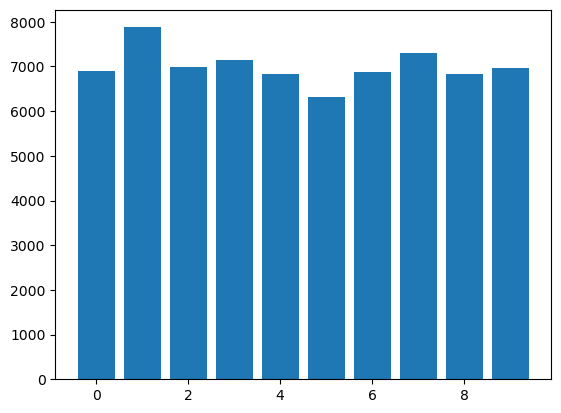

In [33]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

def graf_bar(data):
    dict_1 = {}
    for i in data:
        if i in dict_1:
            dict_1[i] += 1
        else:
            dict_1[i] = 1
    return plt.bar(x=list(dict_1.keys()), height=list(dict_1.values()))
graf_d = graf_bar(digits_labels)

In [34]:
# import requests

# url = 'https://iaexpert.academy/arquivos/alfabeto_A-Z.zip'
# output_file = 'alfabeto_A-Z.zip'

# # Establecer los encabezados para la solicitud
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
# }

# response = requests.get(url, headers=headers)

# # Verificar si la solicitud fue exitosa
# if response.status_code == 200:
#     with open(output_file, 'wb') as f:
#         f.write(response.content)
#     print(f'Descarga completa: {output_file}')
# else:
#     print(f'Error al descargar el archivo: {response.status_code} {response.reason}')

# zip_object = zipfile.ZipFile(file = './alfabeto_A-Z.zip', mode = 'r')
# zip_object.extractall('./')
# zip_object.close()

In [35]:
dataset_az = pd.read_csv('./A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
alphabet_labels = dataset_az['0']
alphabet_data = dataset_az.drop('0', axis=1)

In [37]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28,28))

Text(0.5, 1.0, 'Class17.0')

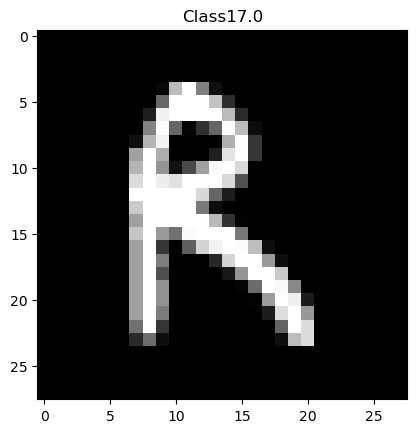

In [38]:
x = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[x], cmap='gray');
plt.title('Class' + str(alphabet_labels[x]))

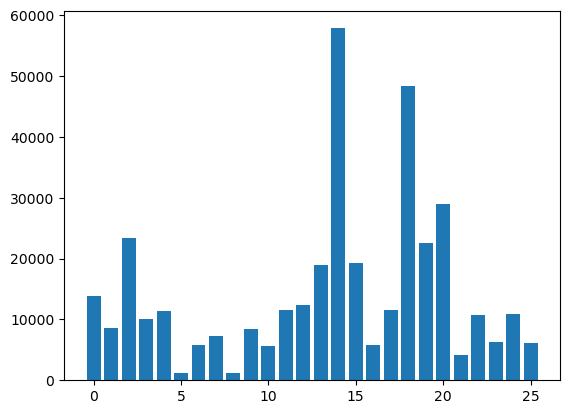

In [39]:
graf_labels = graf_bar(alphabet_labels)

In [40]:
alphabet_labels += 10
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [41]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])
data = np.array(data, dtype='float32')
data = np.expand_dims(data, axis = -1)

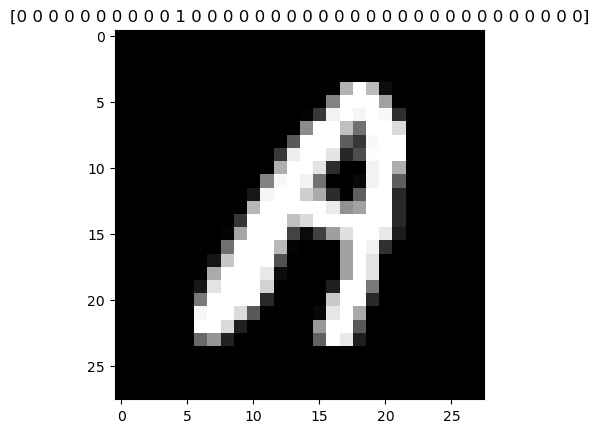

In [42]:
data /= 255.0

data[0].min(), data[0].max()

le = LabelBinarizer()
labels = le.fit_transform(labels)
np.unique(labels)

plt.imshow(data[0].reshape(28, 28), cmap='gray')
plt.title(str(labels[0]));

In [43]:
data[0].shape

(28, 28, 1)

In [44]:
classes_total = labels.sum(axis=0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [45]:
classes_weights = {}
for i in range(0, len(classes_total)):
    classes_weights[i] = classes_total.max() / classes_total[i]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, 
                                  width_shift_range=0.1, height_shift_range=0.1, 
                                  horizontal_flip=False)

network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.25))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.25))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.25))

network.add(Flatten())
network.add(Dense(64, activation = 'relu'))
network.add(Dropout(0.25))

network.add(Dense(128, activation = 'relu'))
network.add(Dropout(0.25))

network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

network.summary()


name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

file_model = 'third_model.keras'

batch_size = 128

checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose=1, save_best_only = True)

early_stopping = EarlyStopping(monitor = 'val_loss', patience=7, verbose=1)

history = network.fit(augmentation.flow(X_train, y_train, batch_size = batch_size), 
                                        validation_data = (X_test, y_test), 
                                        steps_per_epoch = len(X_train)//batch_size, epochs = 100,
                                        class_weight = classes_weights, verbose = 1, 
                                        callbacks = [checkpointer, early_stopping])

network.save('./models/10_model.h5', save_format='h5')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

692/692 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.17      0.94      0.29      1381
           1       0.96      0.99      0.98      1575
           2       0.88      0.97      0.92      1398
           3       0.96      0.99      0.97      1428
           4       0.88      0.96      0.92      1365
           5       0.64      0.92      0.75      1263
           6       0.93      0.98      0.95      1375
           7       0.92      0.99      0.96      1459
           8       0.92      0.99      0.95      1365
           9       0.95      0.98      0.97      1392
           A       0.98      0.99      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.99      0.99      0.99      4682
           D       0.94      0.94      0.94      2027
           E       1.00      0.96      0.98      2288
           F       0.90      1.00      0.95       233
           G       0.98   

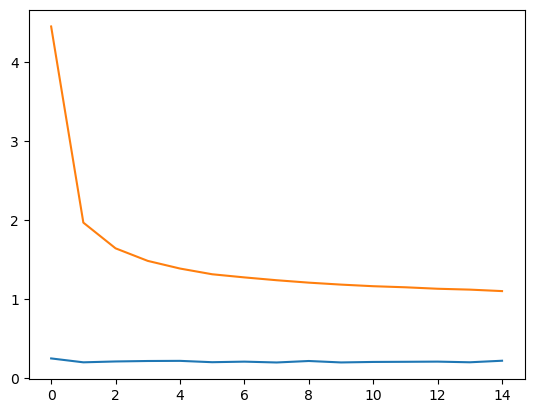

In [18]:
predictions = network.predict(X_test, batch_size =batch_size)
predictions

print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names= name_labels))

plt.plot(history.history['val_loss']);
plt.plot(history.history['loss']);

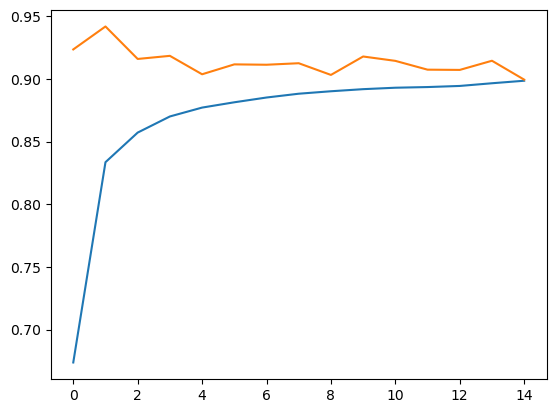

In [19]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);

In [42]:
import numpy as np
import cv2
from keras.applications import MobileNetV2, ResNet50, EfficientNetB0, VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Assuming data and labels are already defined
tf.compat.v1.disable_eager_execution()
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

# Resize images to 32x32
X_train = np.array([cv2.resize(img, (32, 32)) for img in X_train])
X_test = np.array([cv2.resize(img, (32, 32)) for img in X_test])

# Repeat channels to create 3-channel images
X_train = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=-1)
X_test = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=-1)

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Load pre-trained MobileNetV2 model + higher level layers
NetV2 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in NetV2.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
x = NetV2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(36, activation='softmax')(x)

# Compile the model
model_net = Model(inputs=NetV2.input, outputs=predictions)
model_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_net.summary()

# Data augmentation
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05,
                                  width_shift_range=0.1, height_shift_range=0.1,
                                  horizontal_flip=False)

# Generators for training and validation data
train_generator = augmentation.flow(X_train, y_train, batch_size=32)
validation_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# Callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model_net.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)

model_net.save('./models/11_model.h5', save_format='h5')


Instructions for updating:
Colocations handled automatically by placer.
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_2 (Rescaling)        (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 32, 32, 3)   7           ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                                  
 rescaling_3 (Rescal

c:\Users\santi\Anaconda3\envs\gpu_2\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 3.66827, saving model to best_model.h5


TypeError: cannot pickle '_thread.RLock' object

In [20]:
import numpy as np
import cv2
from keras.applications import MobileNetV2, ResNet50, EfficientNetB0, VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Assuming data and labels are already defined

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

# Resize images to 32x32
X_train = np.array([cv2.resize(img, (32, 32)) for img in X_train])
X_test = np.array([cv2.resize(img, (32, 32)) for img in X_test])

# Repeat channels to create 3-channel images
X_train = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=-1)
X_test = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=-1)

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Load pre-trained MobileNetV2 model + higher level layers
NetV2 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in NetV2.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
x = NetV2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(36, activation='softmax')(x)

# Compile the model
model_net = Model(inputs=NetV2.input, outputs=predictions)
model_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_net.summary()

# Data augmentation
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05,
                                  width_shift_range=0.1, height_shift_range=0.1,
                                  horizontal_flip=False)

# Generators for training and validation data
train_generator = augmentation.flow(X_train, y_train, batch_size=32)
validation_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# Callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model_net.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32,
    epochs=200,
    callbacks=[checkpoint, early_stopping]
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

2766/2766 [==============================] - 14s 5ms/step


c:\Users\santi\Anaconda3\envs\gpu_2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\Anaconda3\envs\gpu_2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\Anaconda3\envs\gpu_2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1381
           1       0.93      0.73      0.82      1575
           2       0.19      0.16      0.17      1398
           3       0.16      0.46      0.23      1428
           4       0.23      0.37      0.28      1365
           5       0.15      0.03      0.04      1263
           6       0.47      0.65      0.54      1375
           7       0.69      0.17      0.27      1459
           8       0.20      0.71      0.32      1365
           9       0.29      0.75      0.41      1392
           A       0.32      0.58      0.41      2774
           B       0.13      0.34      0.19      1734
           C       0.86      0.10      0.18      4682
           D       0.11      0.00      0.00      2027
           E       0.74      0.29      0.42      2288
           F       0.96      0.10      0.19       233
           G       0.14      0.15      0.14      1152
           H       0.23    

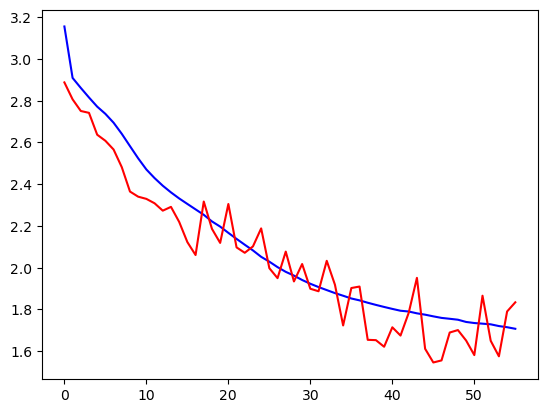

In [21]:

predictions = model_net.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names= name_labels))


plt.plot(history.history['loss'], color='b');
plt.plot(history.history['val_loss'], color='r');

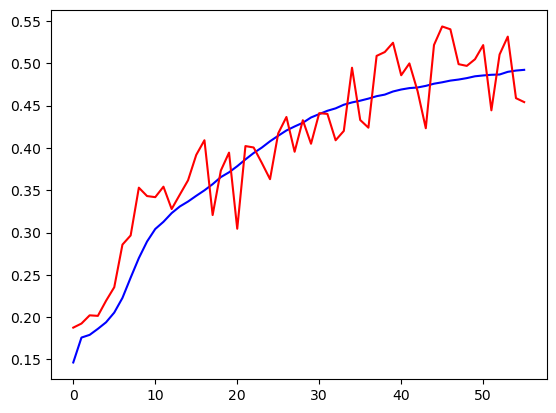

In [24]:
NetV2.save('./models/11_model.h5', save_format='h5')
plt.plot(history.history['accuracy'], color='b');
plt.plot(history.history['val_accuracy'], color='r');

In [29]:
print(f'X_test shape: {X_test.shape}') 

X_test shape: (88490, 32, 32, 3)


X_test shape: (88490, 32, 32, 3)
1/1 [==============================] - 0s 20ms/step


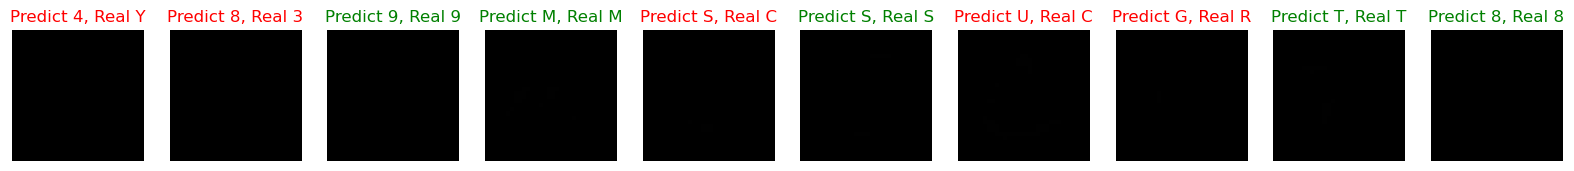

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder

# Suponiendo que name_labels y le ya están definidos y correctamente configurados

# Verificar los datos de X_test
print(f'X_test shape: {X_test.shape}')  # Debería ser (num_samples, 32, 32, 3)

# Invertir la transformación y convertir a int (asumiendo que ya está hecho correctamente)
y_test_real = le.inverse_transform(y_test)
y_test_real = y_test_real.astype(int)

# Definir la función de predicción
def make_pred(num):
    x_1 = np.expand_dims(X_test[num], axis=0)
    prd = model_net.predict(x_1)
    pred_class = np.argmax(prd[0])

    if pred_class >= len(name_labels) or y_test_real[num] >= len(name_labels):
        print(f"Índice fuera de rango: pred_class={pred_class}, real_class={y_test_real[num]}")
        return None, None

    return name_labels[pred_class], name_labels[y_test_real[num]]

# Graficar las predicciones
fig, axes = plt.subplots(1, 10, figsize=(20, 5))

for i in range(10):
    x = random.randint(0, len(X_test) - 1)
    pred, real_v = make_pred(num=x)

    if pred is not None and real_v is not None:
        is_correct = pred == real_v

        axes[i].set_title(label=f'Predict {pred}, Real {real_v}', color='g' if is_correct else 'r')
        axes[i].imshow(X_test[x])  # No usar cmap='gray' ya que son imágenes a color
        axes[i].axis('off')
    else:
        axes[i].set_title(label='Error')
        axes[i].axis('off')

plt.show()



In [18]:
import numpy as np
import cv2
from keras.applications import MobileNetV2, ResNet50, EfficientNetB0, VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Assuming data and labels are already defined

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

# Resize images to 32x32
X_train = np.array([cv2.resize(img, (32, 32)) for img in X_train])
X_test = np.array([cv2.resize(img, (32, 32)) for img in X_test])

# Repeat channels to create 3-channel images
X_train = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=-1)
X_test = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=-1)

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Load pre-trained MobileNetV2 model + higher level layers
NetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in NetV2.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
x = NetV2.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(36, activation='softmax')(x)

# Compile the model
model_net = Model(inputs=NetV2.input, outputs=predictions)
model_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_net.summary()

# Data augmentation
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05,
                                  width_shift_range=0.1, height_shift_range=0.1,
                                  horizontal_flip=False)

# Generators for training and validation data
train_generator = augmentation.flow(X_train, y_train, batch_size=32)
validation_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# Callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model_net.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [26]:
import numpy as np
import cv2
from keras.applications import MobileNetV2, ResNet50, EfficientNetB0, VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Assuming data and labels are already defined

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

# Resize images to 32x32
X_train = np.array([cv2.resize(img, (32, 32)) for img in X_train])
X_test = np.array([cv2.resize(img, (32, 32)) for img in X_test])

# Repeat channels to create 3-channel images
X_train = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=-1)
X_test = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=-1)

# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Load pre-trained MobileNetV2 model + higher level layers
ResN50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in ResN50.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
x = ResN50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(36, activation='softmax')(x)

# Compile the model
model_net = Model(inputs=ResN50.input, outputs=predictions)
model_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_net.summary()

# Data augmentation
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05,
                                  width_shift_range=0.1, height_shift_range=0.1,
                                  horizontal_flip=False)

# Generators for training and validation data
train_generator = augmentation.flow(X_train, y_train, batch_size=32)
validation_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# Callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model_net.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=validation_generator,
    validation_steps=len(X_test) // 32,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [28]:

predictions = model_net.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names= name_labels))

# plt.plot(history.history['val_loss']);

2766/2766 [==============================] - 23s 8ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1381
           1       0.00      0.00      0.00      1575
           2       0.00      0.00      0.00      1398
           3       0.00      0.00      0.00      1428
           4       0.00      0.00      0.00      1365
           5       0.00      0.00      0.00      1263
           6       0.00      0.00      0.00      1375
           7       0.00      0.00      0.00      1459
           8       0.00      0.00      0.00      1365
           9       0.00      0.00      0.00      1392
           A       0.00      0.00      0.00      2774
           B       0.00      0.00      0.00      1734
           C       0.00      0.00      0.00      4682
           D       0.00      0.00      0.00      2027
           E       0.00      0.00      0.00      2288
           F       0.00      0.00      0.00       233
           G       0.00

c:\Users\santi\Anaconda3\envs\gpu_2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\Anaconda3\envs\gpu_2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\santi\Anaconda3\envs\gpu_2\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


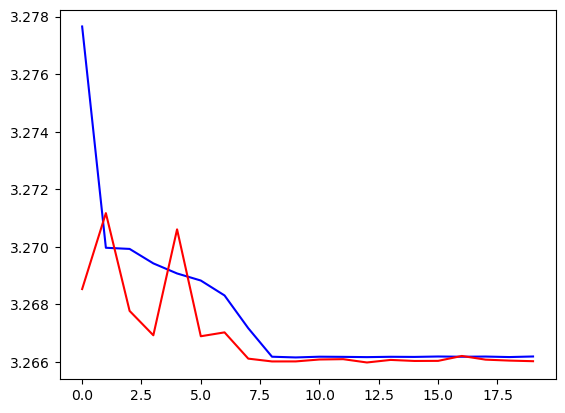

In [32]:
plt.plot(history.history['loss'], color='b');
plt.plot(history.history['val_loss'], color='r');

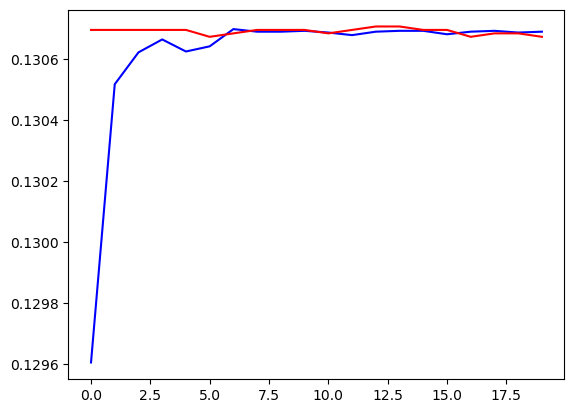

In [34]:
plt.plot(history.history['accuracy'], color='b');
plt.plot(history.history['val_accuracy'], color='r');

1383/1383 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.23      0.62      0.33      1381
           1       0.95      0.98      0.97      1575
           2       0.90      0.93      0.91      1398
           3       0.95      0.96      0.96      1428
           4       0.78      0.96      0.86      1365
           5       0.39      0.94      0.55      1263
           6       0.90      0.95      0.93      1375
           7       0.91      0.97      0.94      1459
           8       0.72      0.97      0.83      1365
           9       0.91      0.97      0.94      1392
           A       0.95      0.98      0.96      2774
           B       0.95      0.87      0.91      1734
           C       0.99      0.94      0.97      4682
           D       0.96      0.88      0.92      2027
           E       0.97      0.96      0.97      2288
           F       0.85      1.00      0.92       233
           G       0.84 

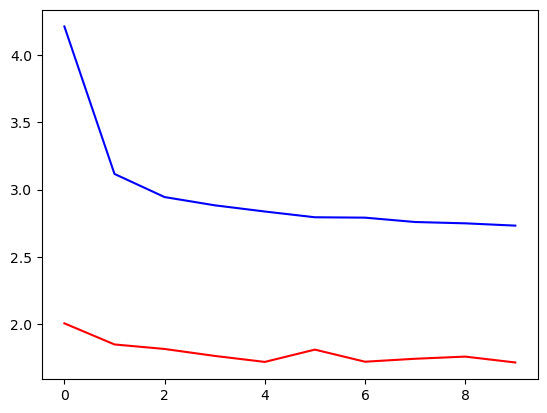

In [38]:
predictions = network.predict(X_test, batch_size =batch_size)
predictions

print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names= name_labels))

plt.plot(history.history['val_loss'], color='r');
plt.plot(history.history['loss'], color='b');

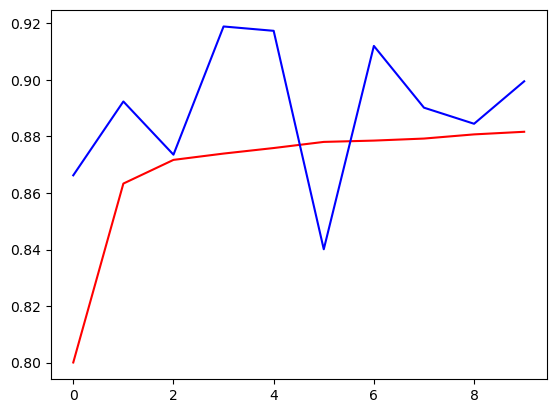

In [40]:
plt.plot(history.history['accuracy'], color='r');
plt.plot(history.history['val_accuracy'], color='b');

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, 
                                  width_shift_range=0.1, height_shift_range=0.1, 
                                  horizontal_flip=False)

network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
len(name_labels)

file_model = 'custom_ocr.keras'
epochs = 20
batch_size = 128

checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose=1, save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience = 7, verbose = 1)

history = network.fit(augmentation.flow(X_train, y_train, batch_size = batch_size), 
                                        validation_data = (X_test, y_test), 
                                        steps_per_epoch = len(X_train)//batch_size, epochs = 100,
                                        class_weight = classes_weights, verbose = 1, 
                                        callbacks = [checkpointer, early_stopping])

network.save('./models/third_model.h5', save_format='h5')

predictions = network.predict(X_test, batch_size =batch_size)


Epoch 1/100
2765/2765 [==============================] - ETA: 0s - loss: 2.2473 - accuracy: 0.8205
Epoch 1: val_loss improved from inf to 0.22308, saving model to custom_ocr.keras
2765/2765 [==============================] - 103s 36ms/step - loss: 2.2473 - accuracy: 0.8205 - val_loss: 0.2231 - val_accuracy: 0.9089
Epoch 2/100
2765/2765 [==============================] - ETA: 0s - loss: 0.9721 - accuracy: 0.9019
Epoch 2: val_loss improved from 0.22308 to 0.21322, saving model to custom_ocr.keras
2765/2765 [==============================] - 101s 36ms/step - loss: 0.9721 - accuracy: 0.9019 - val_loss: 0.2132 - val_accuracy: 0.9097
Epoch 3/100
2765/2765 [==============================] - ETA: 0s - loss: 0.8082 - accuracy: 0.9132
Epoch 3: val_loss did not improve from 0.21322
2765/2765 [==============================] - 100s 36ms/step - loss: 0.8082 - accuracy: 0.9132 - val_loss: 0.2727 - val_accuracy: 0.8851
Epoch 4/100
2764/2765 [============================>.] - ETA: 0s - loss: 0.7154 - 

array([[8.61278474e-01, 3.07062373e-06, 1.07847484e-07, ...,
        9.53973437e-25, 8.12386269e-10, 6.67298248e-13],
       [0.00000000e+00, 3.09394777e-30, 4.17067498e-37, ...,
        0.00000000e+00, 3.09002498e-27, 3.39562349e-32],
       [2.59592520e-21, 3.89559951e-25, 2.18657634e-17, ...,
        9.99426354e-21, 9.02246674e-18, 1.25807591e-32],
       ...,
       [1.84836145e-02, 4.38342635e-12, 5.89393604e-15, ...,
        0.00000000e+00, 2.79276060e-12, 3.09631727e-29],
       [0.00000000e+00, 1.25761025e-17, 1.28039980e-18, ...,
        9.99615312e-01, 3.97927664e-08, 2.95274195e-14],
       [4.15590405e-15, 3.59968685e-35, 6.07911842e-29, ...,
        0.00000000e+00, 3.52199493e-26, 8.98466456e-21]], dtype=float32)

In [38]:


print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=name_labels))

              precision    recall  f1-score   support

           0       0.53      0.38      0.45      1381
           1       0.97      0.98      0.97      1575
           2       0.97      0.91      0.94      1398
           3       0.98      0.98      0.98      1428
           4       0.95      0.90      0.92      1365
           5       0.79      0.88      0.83      1263
           6       0.96      0.94      0.95      1375
           7       0.97      0.98      0.97      1459
           8       0.96      0.98      0.97      1365
           9       0.98      0.97      0.98      1392
           A       0.99      0.99      0.99      2774
           B       0.96      0.99      0.98      1734
           C       0.98      0.98      0.98      4682
           D       0.91      0.96      0.94      2027
           E       0.99      0.97      0.98      2288
           F       0.98      0.94      0.96       233
           G       0.91      0.97      0.94      1152
           H       0.98    

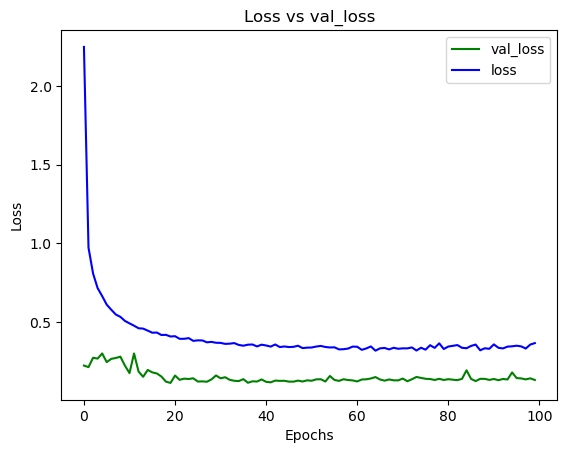

In [39]:
plt.plot(history.history['val_loss'], color = 'g', label = 'val_loss')
plt.plot(history.history['loss'], color = 'b', label='loss')

plt.xlabel(xlabel='Epochs')
plt.ylabel(ylabel='Loss')
plt.title(label='Loss vs val_loss')
plt.autoscale(enable=True)
plt.legend()
plt.show()

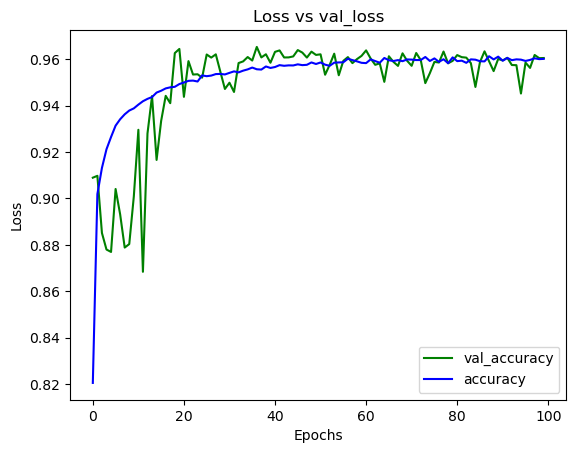

In [37]:
plt.plot(history.history['val_accuracy'], color = 'g', label='val_accuracy')
plt.plot(history.history['accuracy'], color = 'b', label='accuracy')

plt.xlabel(xlabel='Epochs')
plt.ylabel(ylabel='Loss')
plt.title(label='Loss vs val_loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

model = load_model('./models/third')

In [168]:
y_test_real = le.inverse_transform(y_test)
y_test_real = y_test_real.astype(int)
y_test_real

def make_pred(num):
    x_1 = np.expand_dims(X_test[num], axis=0)
    x_1.shape
    prd = network.predict(x_1)
    max_p = [0,0]
    for i in range(len(prd[0])):
        
        if prd[0][i] > max_p[1]:
            max_p[0] = i
            max_p[1] = prd[0][i]

    return name_labels[max_p[0]], name_labels[y_test_real[num]]     


1/1 [==============================] - 0s 19ms/step


('S', 'S')

1/1 [==============================] - 0s 18ms/step


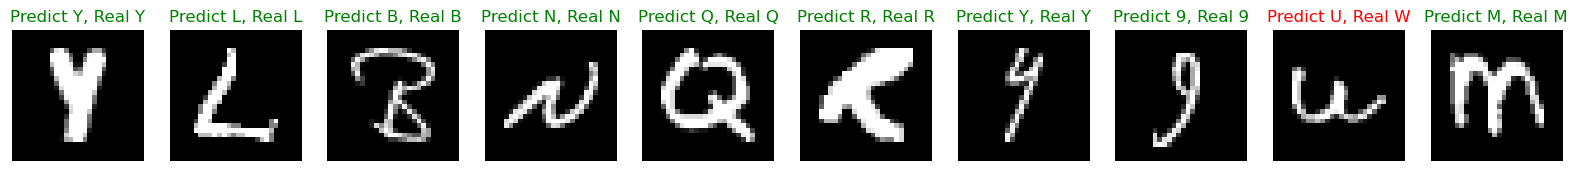

In [183]:
import random


fig, axes = plt.subplots(1, 10, figsize=(20,5))

for i in range(10):
    x = random.randint(1, len(X_test))
    
    pred, real_v = make_pred(num=x)

    axes[i].set_title(label= f'Predict {pred}, Real {real_v}', color = str('g' if pred == real_v else 'r'))

    axes[i].imshow(X_test[x], cmap='gray')
    axes[i].axis(False)
    

1/1 [==============================] - 0s 18ms/step


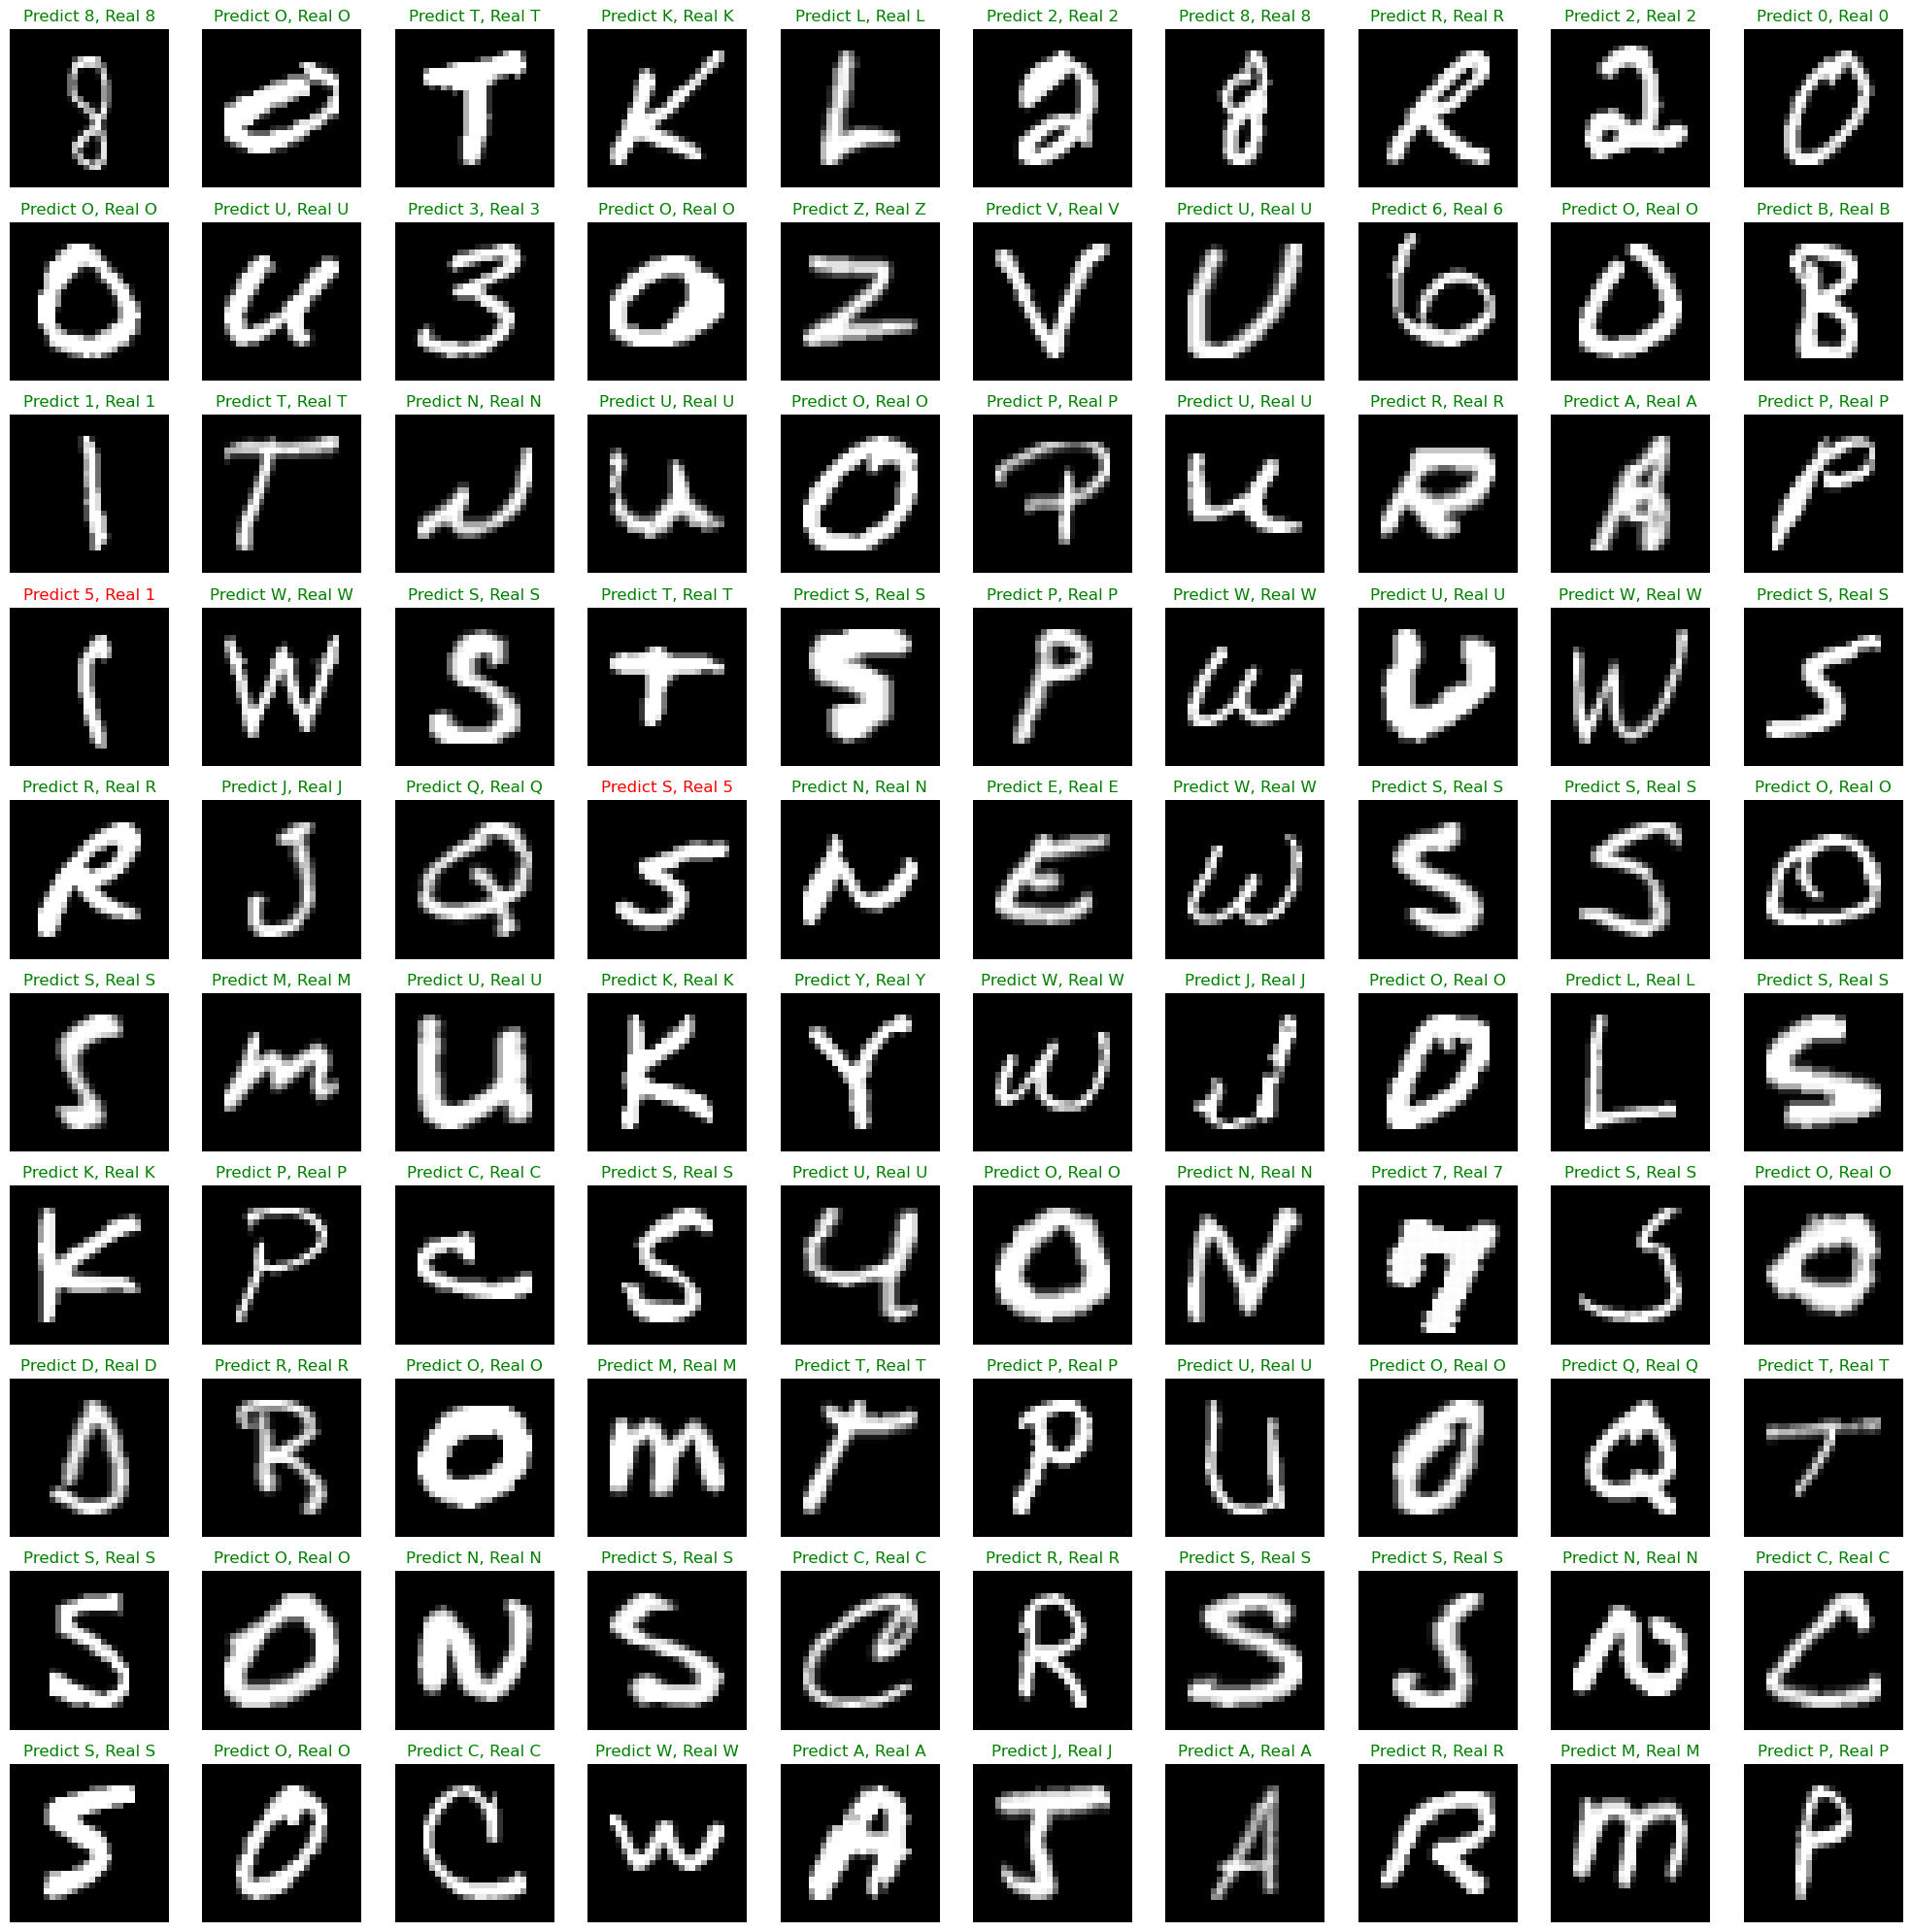

In [187]:
import random
import matplotlib.pyplot as plt

# Suponiendo que X_test tiene al menos 20 elementos para 2 filas y 10 columnas
num_rows = 10
num_cols = 10

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 2 * num_rows))

for i in range(num_rows * num_cols):
    x = random.randint(0, len(X_test) - 1)  # Ajustar el rango de x

    pred, real_v = make_pred(num=x)

    ax = axes[i // num_cols, i % num_cols]  # Calcular la posición en la cuadrícula

    ax.set_title(f'Predict {pred}, Real {real_v}', color='g' if pred == real_v else 'r')
    ax.imshow(X_test[x], cmap='gray')
    ax.axis(False)

plt.tight_layout()
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)

augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, 
                                  width_shift_range=0.1, height_shift_range=0.1, 
                                  horizontal_flip=False)

network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]
len(name_labels)

file_model = 'custom_ocr.keras'
epochs = 20
batch_size = 128

checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose=1, save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience = 7, verbose = 1)

history = network.fit(augmentation.flow(X_train, y_train, batch_size = batch_size), 
                                        validation_data = (X_test, y_test), 
                                        steps_per_epoch = len(X_train)//batch_size, epochs = 100,
                                        class_weight = classes_weights, verbose = 1, 
                                        callbacks = [checkpointer, early_stopping])

network.save('./models/fourth_model.h5', save_format='h5')

predictions = network.predict(X_test, batch_size =batch_size)

Epoch 1/100
2765/2765 [==============================] - ETA: 0s - loss: 2.1746 - accuracy: 0.8276
Epoch 1: val_loss improved from inf to 0.27829, saving model to custom_ocr.keras
2765/2765 [==============================] - 101s 36ms/step - loss: 2.1746 - accuracy: 0.8276 - val_loss: 0.2783 - val_accuracy: 0.8737
Epoch 2/100
2765/2765 [==============================] - ETA: 0s - loss: 0.9963 - accuracy: 0.9004
Epoch 2: val_loss improved from 0.27829 to 0.23883, saving model to custom_ocr.keras
2765/2765 [==============================] - 100s 36ms/step - loss: 0.9963 - accuracy: 0.9004 - val_loss: 0.2388 - val_accuracy: 0.9060
Epoch 3/100
2764/2765 [============================>.] - ETA: 0s - loss: 0.8211 - accuracy: 0.9122
Epoch 3: val_loss did not improve from 0.23883
2765/2765 [==============================] - 99s 36ms/step - loss: 0.8210 - accuracy: 0.9122 - val_loss: 0.2814 - val_accuracy: 0.8847
Epoch 4/100
2765/2765 [==============================] - ETA: 0s - loss: 0.7252 - a